In [38]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ass
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import LedoitWolf
from sklearn.covariance import MinCovDet
from sklearn.covariance import OAS
from sklearn.covariance import GraphicalLasso

In [40]:
import numpy as np
import seaborn as sns
import pandas as pd

In [41]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
#data set yolu

In [42]:
df.Publisher.mode()
#Which company is the most common video game publisher?

0    Electronic Arts
dtype: object

In [43]:
df.Platform.mode()
#What’s the most common platform?

0    DS
dtype: object

In [44]:
df.Genre.mode()
#What about the most common genre?

0    Action
dtype: object

In [45]:
df.sort_values(by="Global_Sales", ascending=False).head(20)
#4. What are the top 20 highest grossing games?


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [46]:
# Make a new Dataframe called NA_sales that returns only the games with the median North American Sales value (0.08)
NA_sales = df[df.NA_Sales == df.NA_Sales.median()]

# Find the number of rows in the new Dataframe and divide by 2 to find the middle row
middle_row = NA_sales.shape[0] // 2 

# Display the 5 rows above & below the middle row
NA_sales[middle_row-5:middle_row+5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9931,9933,Spider-Man: Edge of Time,3DS,2011.0,Action,Activision,0.08,0.03,0.00,0.01,0.12
9934,9936,Turok: Evolution,GBA,2002.0,Shooter,Acclaim Entertainment,0.08,0.03,0.00,0.00,0.12
9957,9959,Deadpool,XOne,2015.0,Action,Activision,0.08,0.03,0.00,0.01,0.12
9996,9998,GT Advance 2: Rally Racing,GBA,2001.0,Racing,THQ,0.08,0.03,0.00,0.00,0.11
10000,10002,A Witch's Tale,DS,2009.0,Role-Playing,Nippon Ichi Software,0.08,0.00,0.03,0.01,0.11
10012,10014,Nickelodeon Dance,X360,2011.0,Misc,Take-Two Interactive,0.08,0.02,0.00,0.01,0.11
10020,10022,Phantasy Star Collection,GBA,2002.0,Role-Playing,Atari,0.08,0.03,0.00,0.00,0.11
10022,10024,LEGO Knights' Kingdom,GBA,2004.0,Action,THQ,0.08,0.03,0.00,0.00,0.11
10024,10026,Family Game Night 4: The Game Show,PS3,2011.0,Misc,Electronic Arts,0.08,0.02,0.00,0.01,0.11
10026,10028,NBA Jam 2002,GBA,2002.0,Sports,Acclaim Entertainment,0.08,0.03,0.00,0.00,0.11


In [47]:
# Find mean North American sales 
mean = df.NA_Sales.mean()

# Find standard deviation of North American sales
std = df.NA_Sales.std()

# For the highest grossing game of all time, find its North American sales
top_games_NA_sales = df.sort_values(by="Global_Sales", ascending=False).NA_Sales.max()

# Find how many sales above the mean North American sales value and then devide by the standard deviation
(top_games_NA_sales - mean)/std

50.47898767479108

In [48]:
# Find the average number of sales for games on the Nintendo Wii platform
wii_sales_mean = df[df.Platform == "Wii"].Global_Sales.mean()

# Find the average number of sales for games NOT on the Nintendo Wii platform
other_sales_mean = df[df.Platform != "Wii"].Global_Sales.mean()

# Divide the average number of Wii sales by the average number of non-Wii sales and convert to a percentage 
(wii_sales_mean / other_sales_mean - 1)*100

33.62965516676526

In [49]:
#What are the top 5 most popular game genres based on the top 100 best selling games?
# Find the top 100 best selling games based on global sales
top_100_games = df.sort_values(by="Global_Sales", ascending=False).head(100)

# Count the number of times each genre is listed and return the top 5 genres
top_100_games.Genre.value_counts().head(5)

Shooter         22
Platform        16
Role-Playing    15
Action          12
Racing          10
Name: Genre, dtype: int64

In [50]:
# Find min and max release year
min = df.Year.min()
max = df.Year.max()

# Make loop to find avergae global sales for each year and appened to a list
year_list = []
for year in range(int(min), int(max)+1):
    avg = df[df.Year == year].Global_Sales.mean()
    year_list.append([year, avg])

# Create a new Dataframe and add the list with years with the sorted average global sales
new_df = pd.DataFrame()
new_df[['Year', 'Avg Global Sales']] = year_list
new_df.sort_values(by="Avg Global Sales", ascending = False).head(10).reset_index(drop=True)

,Year,Avg Global Sales
0,1989.0,4.320588
1,1985.0,3.852857
2,1984.0,3.597143
3,1988.0,3.148000
4,1990.0,3.086875
5,1992.0,1.771163
6,1986.0,1.765238
7,1987.0,1.358750
8,1980.0,1.264444
9,1983.0,0.987647


In [51]:
#How do the top 10 best selling games differ among North American, European, and Japanese markets?
# Find the top 10 best selling games in North America
NA_series = df.sort_values(by="NA_Sales", ascending=False).head(10)[["Name", "NA_Sales"]].reset_index(drop=True)

# Find the top 10 best selling games in Europe
EU_series = df.sort_values(by="EU_Sales", ascending=False).head(10)[["Name", "EU_Sales"]].reset_index(drop=True)

# Find the top 10 best selling games in Japan
JP_series = df.sort_values(by="JP_Sales", ascending=False).head(10)[["Name", "JP_Sales"]].reset_index(drop=True)

# Create a new Dataframe and add the series for each region
new_df = pd.DataFrame()
new_df[['North America Top 10', 'NA Sales']] = NA_series
new_df[['Europe Top 10', 'EU Sales']] = EU_series
new_df[['Japan Top 10', 'JP Sales']] = JP_series
new_df

,North America Top 10,NA Sales,Europe Top 10,EU Sales,Japan Top 10,JP Sales
0,Wii Sports,41.49,Wii Sports,29.02,Pokemon Red/Pokemon Blue,10.22
1,Super Mario Bros.,29.08,Mario Kart Wii,12.88,Pokemon Gold/Pokemon Silver,7.20
2,Duck Hunt,26.93,Wii Sports Resort,11.01,Super Mario Bros.,6.81
3,Tetris,23.20,Nintendogs,11.00,New Super Mario Bros.,6.50
4,Mario Kart Wii,15.85,Grand Theft Auto V,9.27,Pokemon Diamond/Pokemon Pearl,6.04
5,Wii Sports Resort,15.75,Brain Age: Train Your Brain in Minutes a Day,9.26,Pokemon Black/Pokemon White,5.65
6,Kinect Adventures!,14.97,New Super Mario Bros.,9.23,Pokemon Ruby/Pokemon Sapphire,5.38
7,New Super Mario Bros. Wii,14.59,Wii Play,9.20,Animal Crossing: Wild World,5.33
8,Wii Play,14.03,Pokemon Red/Pokemon Blue,8.89,Brain Age 2: More Training in Minutes a Day,5.32
9,Super Mario World,12.78,Wii Fit Plus,8.59,Monster Hunter Freedom 3,4.87


In [52]:
df.head(10)

#Displays the first 10 observations of the data frame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [53]:
df.shape
#Displays how many attributes and how many observations the data frame consists of.

(16598, 11)

In [54]:
df.info()
#Displays the type of variables in the dataframe and the memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [55]:
df.describe().T
#describe func. We see that the data becomes more meaningful thanks to
#Varvanys: It is the square and unitless form of the standard deviation. petal_lenght has the largest variance.
# If we are going to compare how flat the data from different world is, we need the variance value.

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [56]:
df.isna().sum()
# Observes how many missing values ​​in each attribute in the data frame

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [57]:
df.corr()
#The existence of a relationship between two or more variables, the direction and severity of this relationship are determined by correlation analysis.
#Correlation coefficient takes value in the range of -1 < r < 1.

#r = -1 (perfect inverse relationship)
#r = 0 (no relation.)
#r = 1 (same-directional perfect relationship)
#r = 0.7 (good relationship in the same direction)
#r = - 0.3 (moderate inverse relationship)

# According to the data, the strongest positive relationship is between petal_width and petal_length.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


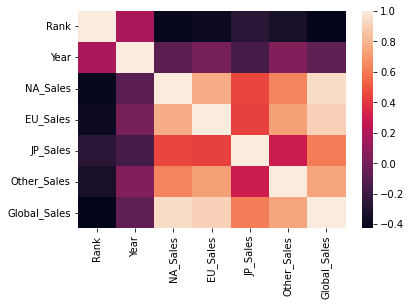

In [58]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values);
#Let's draw a heat map to better read the correlation coefficients.



In [59]:
df["EU_Sales"].unique()
#Displays the "variety" unique values ​​of our dataframe's target variable


array([2.902e+01, 3.580e+00, 1.288e+01, 1.101e+01, 8.890e+00, 2.260e+00,
       9.230e+00, 9.200e+00, 7.060e+00, 6.300e-01, 1.100e+01, 7.570e+00,
       6.180e+00, 8.030e+00, 8.590e+00, 4.940e+00, 9.270e+00, 4.000e-01,
       3.750e+00, 9.260e+00, 4.520e+00, 2.710e+00, 3.440e+00, 5.310e+00,
       5.490e+00, 3.900e+00, 3.280e+00, 5.360e+00, 5.090e+00, 4.280e+00,
       5.040e+00, 3.730e+00, 4.050e+00, 5.810e+00, 5.880e+00, 4.300e+00,
       3.630e+00, 5.820e+00, 4.510e+00, 2.610e+00, 4.440e+00, 3.520e+00,
       3.910e+00, 2.830e+00, 2.770e+00, 2.850e+00, 1.000e-02, 3.400e+00,
       3.370e+00, 2.040e+00, 3.100e+00, 3.870e+00, 2.990e+00, 4.880e+00,
       3.690e+00, 3.760e+00, 2.150e+00, 2.650e+00, 3.110e+00, 3.150e+00,
       2.630e+00, 1.980e+00, 1.940e+00, 3.070e+00, 2.360e+00, 2.470e+00,
       2.890e+00, 3.420e+00, 2.380e+00, 1.710e+00, 2.320e+00, 1.880e+00,
       2.860e+00, 1.240e+00, 6.060e+00, 3.530e+00, 1.530e+00, 2.300e+00,
       1.860e+00, 5.050e+00, 6.420e+00, 2.010e+00, 

In [60]:
df["EU_Sales"].nunique()
#Displays how many unique values ​​the target variable "variety" of the data frame contains.

305

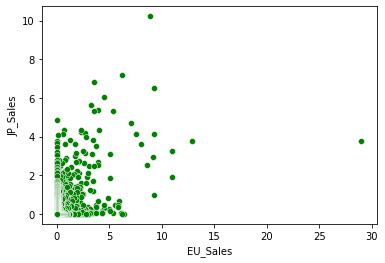

In [61]:
sns.scatterplot(x = "EU_Sales", y = "JP_Sales", data=df, color="green");
#We see that the EU_Sales and JP_Sales variables in the #dataframe are continuous.
# Let's first use scatterplot to visualize these two continuous data.

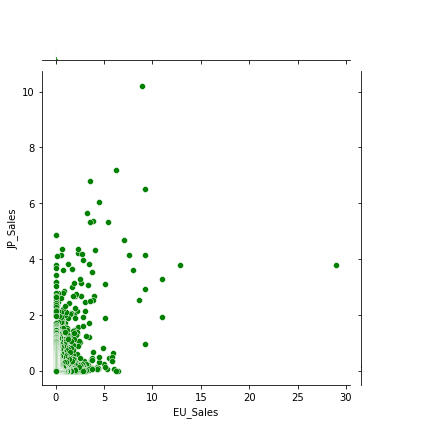

In [62]:
sns.jointplot(x = "EU_Sales", y = "JP_Sales", data=df, color="green");
# Visualize using jointplot to examine the same two data from a different angle with their frequency

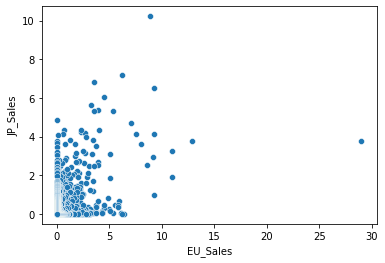

In [63]:
sns.scatterplot(x = "EU_Sales", y = "JP_Sales", data=df);


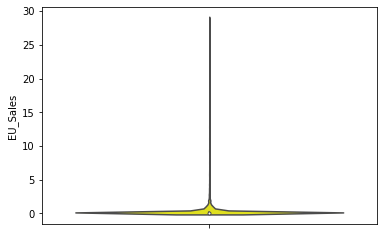

In [64]:
sns.violinplot(y = "EU_Sales", data=df, color="yellow");
#In a normal distribution, the mode, median, and arithmetic mean are equal.
#The maximum point of the curve is the arithmetic mean (hence the mode and median).
#The curve is symmetrical with respect to the arithmetic mean.
# Considering these features, we can say that it is a normal distribution.

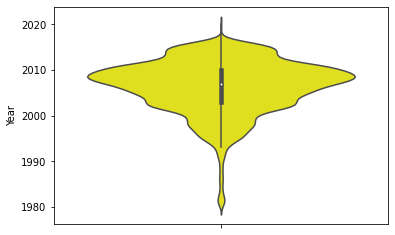

In [65]:
sns.violinplot(y = "Year", data=df, color="yellow");

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


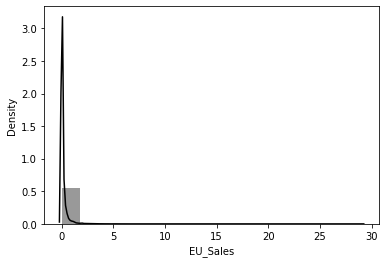

In [66]:
sns.distplot(df["EU_Sales"], bins=16, color="black");


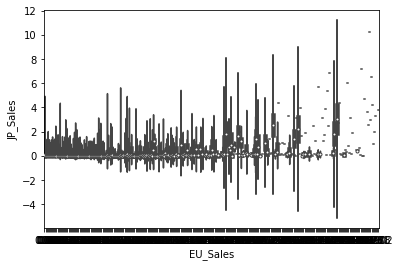

In [67]:
sns.violinplot(x = "EU_Sales", y = "JP_Sales", data=df);

#violin chart for EU_Sales and JP_Sales


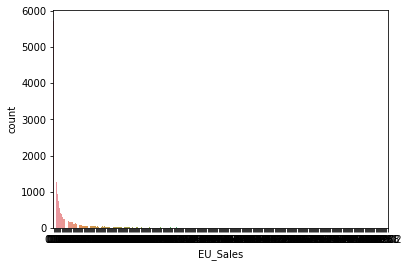

In [68]:
sns.countplot(x = "EU_Sales", data = df);


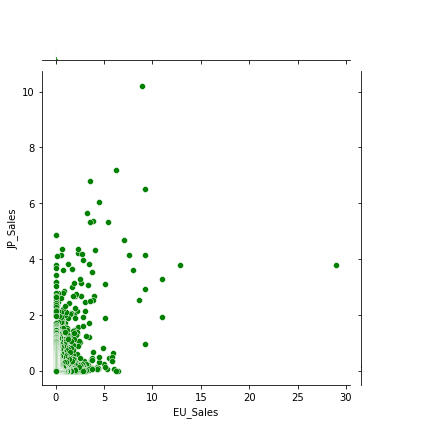

In [69]:
sns.jointplot(x = "EU_Sales", y = "JP_Sales", data=df, color="green");
# Visualizes the EU_Sales and JP_Sales variables with sns.jointplot, gives the distribution and the regions with high frequency of the distribution

In [70]:
#sns.jointplot(x = df["EU_Sales"], y = df["JP_Sales"],kind ="kde", color="red");
#Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

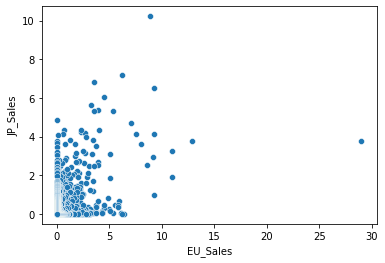

In [71]:
sns.scatterplot(x = "EU_Sales", y = "JP_Sales", data=df);
# Plots the distributions of EU_Salesand JP_Sales variables with scatterplot.

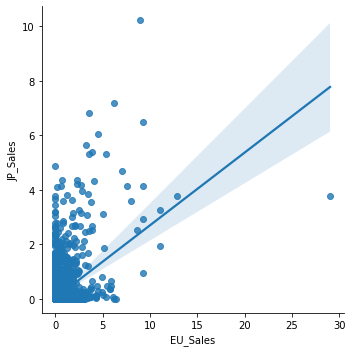

In [72]:
sns.lmplot(x = "EU_Sales", y = "JP_Sales", data = df);
# Implements the sns.lmplot() visualization with the EU_Sales and JP_Sales variables.
# What kind of relationship is there between EU_Sales and JP_Sales, and is this relationship strong? answers the question.


In [73]:
df.corr()["EU_Sales"]["JP_Sales"]
# Prints the correlation coefficient between two variables to reinforce the answer to the above question.


0.4355844528091777

In [74]:
df["EU_Sales"].mean()
# prints the average value of EU_Sales

0.14665200626581515

In [75]:
df["Global_Sales"] = df["NA_Sales"]+df["EU_Sales"]
# Creates a new Global_Sales attribute by summing the EU_Sales and NA_Sales values.

In [76]:
df["Global_Sales"].std()
# Let's print the standard deviation of Global_Sales

1.24741764237099

In [77]:
df["Global_Sales"].max()
# prints the maximum value of Global_Sales

70.51

In [78]:
df.groupby(["Global_Sales"]).mean()
# A grouping operation is performed according to the variety of the target variable and displays the average of our variable values.



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Global_Sales,,,,,,
0.00,11396.671111,2006.495355,0.000000,0.000000,0.146041,0.001585
0.01,15684.378641,2007.865191,0.005204,0.004796,0.011359,0.000466
0.02,14988.502547,2008.067358,0.009100,0.010900,0.002479,0.001460
0.03,13877.693015,2007.075047,0.016489,0.013511,0.013493,0.003456
0.04,13208.512397,2007.244259,0.024731,0.015269,0.008017,0.004318
...,...,...,...,...,...,...
26.76,4.000000,2009.000000,15.750000,11.010000,3.280000,2.960000
27.56,10.000000,1984.000000,26.930000,0.630000,0.280000,0.470000
28.73,3.000000,2008.000000,15.850000,12.880000,3.790000,3.310000


In [79]:
df.groupby(["Global_Sales"])["Other_Sales"].std()
# Our target variable is grouped by variety and only prints the standard deviation values ​​of our Global_Sales variable.



Global_Sales
0.00     0.008127
0.01     0.009282
0.02     0.009910
0.03     0.017128
0.04     0.026244
           ...   
26.76         NaN
27.56         NaN
28.73         NaN
32.66         NaN
70.51         NaN
Name: Other_Sales, Length: 715, dtype: float64

In [80]:
def plot_histogram_with_leaf_id(data, title, random_id):
    number_of_intervals = int(sqrt(len(data)))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    plt.title(f"{title} Histogram of Leaf with ID {random_id}", {"fontsize": 12})
    plt.xlabel(f"{title.lower()} value") 
    plt.ylabel('count') 
    plt.hist(data, label="count", bins = number_of_intervals)
    plt.show()
    
def plot_histogram_for_feature(data, title, feature):
    number_of_intervals = int(sqrt(len(data)))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.title(f"{title} Histogram of {feature}", {"fontsize": 12})
    plt.xlabel(f"{title.lower()} value") 
    plt.ylabel('count') 
    plt.hist(data, label="count", bins = number_of_intervals)
    plt.show()
        
def get_leaf_columns_values(data, column_name):
    column_values = []
    column_data = data.loc[:, f"{column_name}1": f"{column_name}64"]

    for column in column_data.columns:
        column_value = column_data[column].values[0]
        column_values.append(column_value)
        
    return column_values 

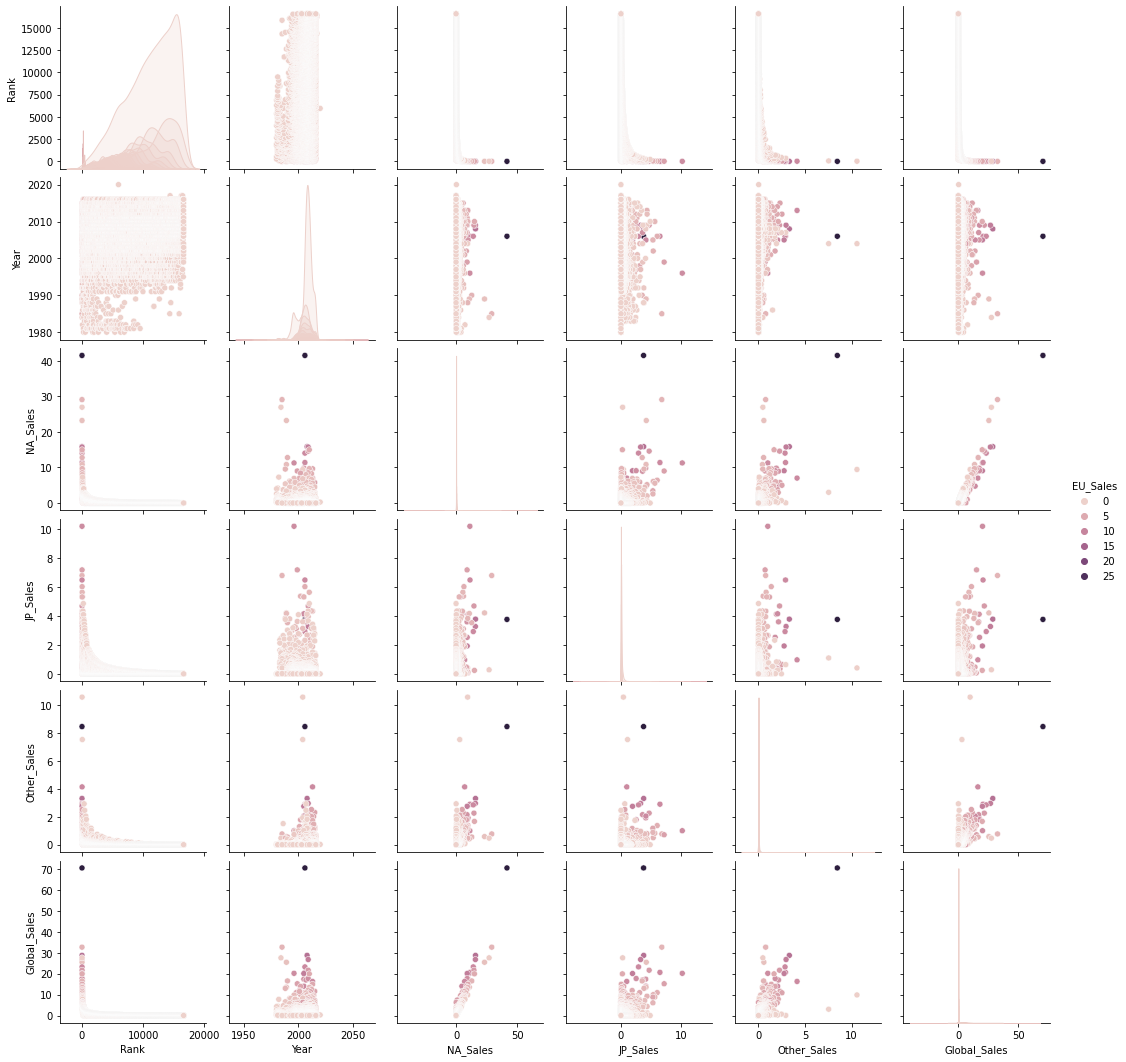

In [81]:
sns.pairplot(df, hue="EU_Sales")